# Solution to the coding activities: "A first projection in OGGM"

Set-up:

In [1]:
from oggm import cfg, utils, workflow, tasks
from oggm.shop import gcm_climate
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir'] = utils.gettempdir(dirname='Solution', reset=True)
# Add additional outputs for the maps below
cfg.PARAMS['store_fl_diagnostics'] = True

rgi_ids = ['RGI60-11.00897']
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.1/elev_bands/W5E5'
gdirs = workflow.init_glacier_directories(rgi_ids, prepro_base_url=base_url, from_prepro_level=4, prepro_border=80)

gdir = gdirs[0]

with xr.open_dataset(gdir.get_filepath('climate_historical')) as ds:
    ds = ds.load()
    
member = 'mri-esm2-0_r1i1p1f1'
ssp = 'ssp126'
workflow.execute_entity_task(gcm_climate.process_monthly_isimip_data, gdirs, 
                             ssp=ssp,  # SSP scenario -> you can choose another one later
                             member=member,  # ensemble member -> you can choose another one later
                             output_filesuffix=f'_ISIMIP3b_{member}_{ssp}',  # make the output file recognizable for later
                             );


with xr.open_dataset(gdir.get_filepath('gcm_data', filesuffix=f'_ISIMIP3b_{member}_{ssp}')) as dsgcm:
    dsgcm = dsgcm.load()

2023-03-11 23:30:48: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2023-03-11 23:30:48: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2023-03-11 23:30:48: oggm.cfg: Multiprocessing: using all available processors (N=8)
2023-03-11 23:30:48: oggm.cfg: PARAMS['store_fl_diagnostics'] changed from `False` to `True`.
2023-03-11 23:30:53: oggm.workflow: init_glacier_directories from prepro level 4 on 1 glaciers.
2023-03-11 23:30:53: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2023-03-11 23:30:53: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers


## Plotting two curves with a legend

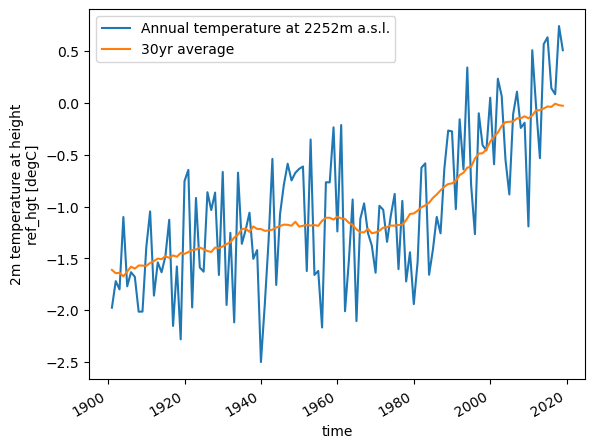

In [2]:
# Plot the data
# first plot mean annual temperture including a label
temp_annual = ds.temp.resample(time='AS').mean()
temp_annual.plot(label=f'Annual temperature at {int(ds.ref_hgt)}m a.s.l.');

# second plot 30 year averaged anual mean temperture including a label
temp_31yr = temp_annual.rolling(time=31, center=True, min_periods=15).mean()
temp_31yr.plot(label='30yr average');

# finally, add a legend to the plot
plt.legend();

## Plotting the GCM data on top of the historical data 

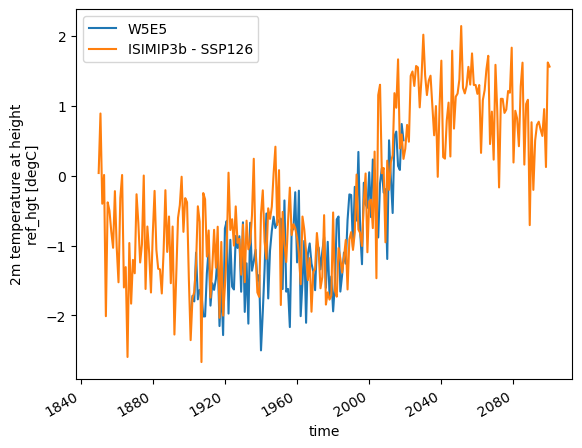

In [3]:
temp_annual.plot(label='W5E5');
dsgcm.temp.resample(time='AS').mean().plot(label='ISIMIP3b - SSP126');
plt.legend();

## Run all scenarios an plot them on one plot

2023-03-11 23:30:55: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2023-03-11 23:30:56: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers
2023-03-11 23:30:57: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2023-03-11 23:30:58: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers
2023-03-11 23:30:58: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2023-03-11 23:30:59: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers


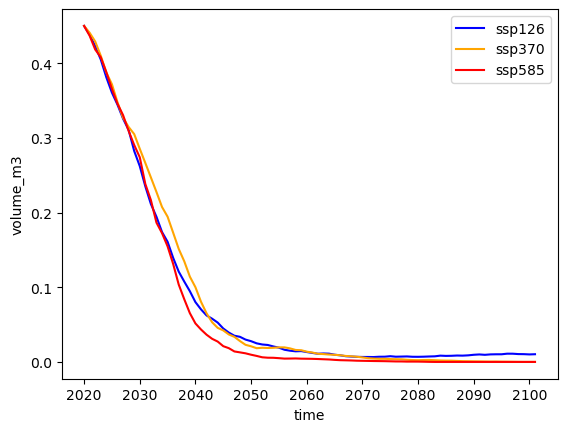

In [4]:
# Run
for ssp in ['ssp126', 'ssp370', 'ssp585']:
    rid = f'_ISIMIP3b_{member}_{ssp}'
    workflow.execute_entity_task(gcm_climate.process_monthly_isimip_data, gdirs, 
                                 ssp = ssp, member=member,
                                 output_filesuffix=rid);
    workflow.execute_entity_task(tasks.run_from_climate_data, gdirs,
                                 climate_filename='gcm_data', 
                                 climate_input_filesuffix=rid,  
                                 init_model_filesuffix='_historical',  
                                 output_filesuffix=rid);


# Plot
# Pick some colors for the lines
color_dict={'ssp126':'blue', 'ssp370':'orange', 'ssp585':'red'}
for ssp in ['ssp126','ssp370', 'ssp585']:
    rid = f'_ISIMIP3b_{member}_{ssp}'
    with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix=rid)) as dsproj:
        vol_proj = dsproj.volume_m3 * 1e-9
    vol_proj.plot(label=ssp, c=color_dict[ssp]);
plt.legend();

## Run Baltoro instead 

2023-03-12 01:14:23: oggm.workflow: init_glacier_directories from prepro level 5 on 1 glaciers.
2023-03-12 01:14:23: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2023-03-12 01:14:24: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2023-03-12 01:14:25: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers
2023-03-12 01:14:25: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2023-03-12 01:14:26: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers
2023-03-12 01:14:26: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 1 glaciers
2023-03-12 01:14:27: oggm.workflow: Execute entity tasks [run_from_climate_data] on 1 glaciers


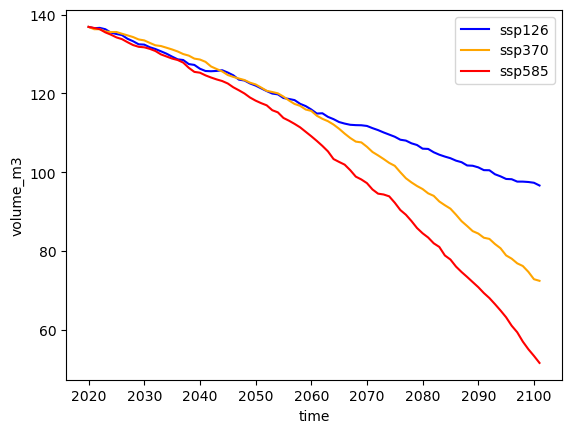

In [6]:
rgi_ids = ['RGI60-14.06794']
gdirs = workflow.init_glacier_directories(rgi_ids, prepro_base_url=base_url, from_prepro_level=5, prepro_border=80)

gdir = gdirs[0]

# Run
for ssp in ['ssp126', 'ssp370', 'ssp585']:
    rid = f'_ISIMIP3b_{member}_{ssp}'
    workflow.execute_entity_task(gcm_climate.process_monthly_isimip_data, gdirs, 
                                 ssp = ssp, member=member,
                                 output_filesuffix=rid);
    workflow.execute_entity_task(tasks.run_from_climate_data, gdirs,
                                 climate_filename='gcm_data', 
                                 climate_input_filesuffix=rid,  
                                 init_model_filesuffix='_historical',  
                                 output_filesuffix=rid);


# Plot
# Pick some colors for the lines
color_dict={'ssp126':'blue', 'ssp370':'orange', 'ssp585':'red'}
for ssp in ['ssp126','ssp370', 'ssp585']:
    rid = f'_ISIMIP3b_{member}_{ssp}'
    with xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix=rid)) as dsproj:
        vol_proj = dsproj.volume_m3 * 1e-9
    vol_proj.plot(label=ssp, c=color_dict[ssp]);
plt.legend();

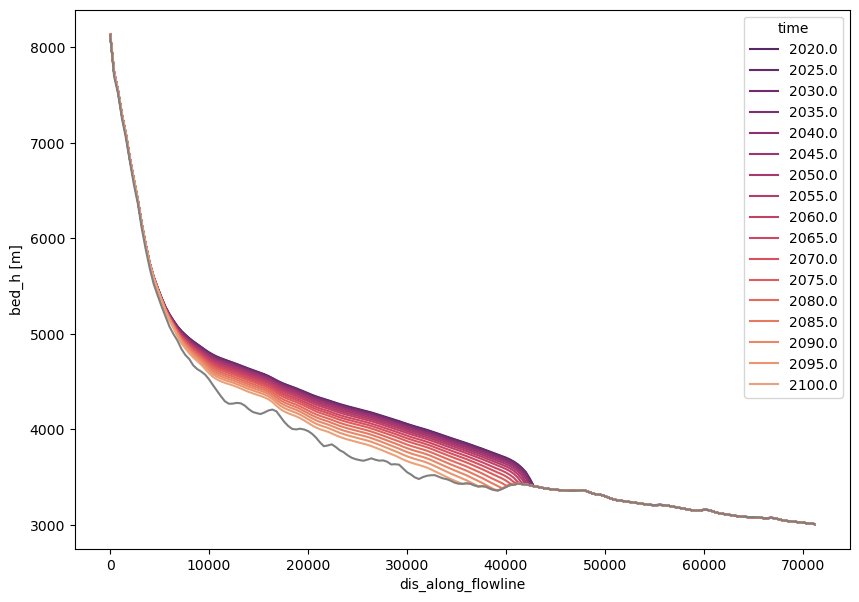

In [8]:
with xr.open_dataset(gdir.get_filepath('fl_diagnostics', filesuffix=rid), group=f'fl_0') as dsfl:
    dsfl = dsfl.load()

surface_h = dsfl.bed_h + dsfl.thickness_m
time_sel = np.linspace(2020, 2100, 17)
colors = sns.color_palette('flare_r', len(time_sel))

with plt.rc_context({'axes.prop_cycle': plt.cycler(color=colors)}):
    f, ax = plt.subplots(figsize=(10, 7))
    surface_h.sel(time=time_sel).plot(ax=ax, hue='time')
    dsfl.bed_h.plot(ax=ax, c='grey')